In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cluster.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()

,Transformed NOX,Transformed PTRATIO,Transformed RM,Transformed TAX,Transformed medv_log,Transformed zn_log,Imputed: Transformed INDUS,Imputed: Transformed age_cube,Imputed: Transformed b_cube,Imputed: Transformed crim_log,Imputed: Transformed dis_log,Imputed: Transformed lstat_log,Imputed: Transformed rad_log,Cluster ID,Distance to Centroid
0,-0.144291,-1.457357,0.417006,-0.667696,0.354355,1.234145,-1.291377,0.058791,0.361340,-1.984815,0.408877,-1.278425,-2.134491,1,7.211366
1,-0.739866,-0.302536,0.197843,-0.988281,0.096559,-0.585512,-0.597155,0.438673,0.361340,-1.307577,0.768952,-0.266895,-1.342719,3,5.553244
2,-0.739866,-0.302536,1.285116,-0.988281,1.256455,-0.585512,-0.597155,-0.065157,0.338135,-1.307916,0.768952,-1.631016,-1.342719,1,6.585399
3,-0.834813,0.113200,1.018990,-1.107015,1.163027,-0.585512,-1.310337,-0.583968,0.348418,-1.228921,1.138192,-2.156341,-0.879562,1,6.230719
4,-0.834813,0.113200,1.231037,-1.107015,1.360002,-0.585512,-1.310337,-0.286922,0.361340,-0.878348,1.138192,-1.165281,-0.879562,1,5.608077


In [2]:
# Mapping of transformed names to original names based on the provided attribute information
column_mapping = {
    'Transformed NOX': 'NOX',
    'Transformed PTRATIO': 'PTRATIO',
    'Transformed RM': 'RM',
    'Transformed TAX': 'TAX',
    'Transformed medv_log': 'MEDV',
    'Transformed zn_log': 'ZN',
    'Imputed: Transformed INDUS': 'INDUS',
    'Imputed: Transformed age_cube': 'AGE',
    'Imputed: Transformed b_cube': 'B',
    'Imputed: Transformed crim_log': 'CRIM',
    'Imputed: Transformed dis_log': 'DIS',
    'Imputed: Transformed lstat_log': 'LSTAT',
    'Imputed: Transformed rad_log': 'RAD',
    'Cluster ID': 'CLUSTER_ID',
    'Distance to Centroid': 'DISTANCE_TO_CENTROID'
}

# Renaming the columns
df_renamed = df.rename(columns=column_mapping)

# Display the dataframe to confirm the changes
df_renamed.head()


,NOX,PTRATIO,RM,TAX,MEDV,ZN,INDUS,AGE,B,CRIM,DIS,LSTAT,RAD,CLUSTER_ID,DISTANCE_TO_CENTROID
0,-0.144291,-1.457357,0.417006,-0.667696,0.354355,1.234145,-1.291377,0.058791,0.361340,-1.984815,0.408877,-1.278425,-2.134491,1,7.211366
1,-0.739866,-0.302536,0.197843,-0.988281,0.096559,-0.585512,-0.597155,0.438673,0.361340,-1.307577,0.768952,-0.266895,-1.342719,3,5.553244
2,-0.739866,-0.302536,1.285116,-0.988281,1.256455,-0.585512,-0.597155,-0.065157,0.338135,-1.307916,0.768952,-1.631016,-1.342719,1,6.585399
3,-0.834813,0.113200,1.018990,-1.107015,1.163027,-0.585512,-1.310337,-0.583968,0.348418,-1.228921,1.138192,-2.156341,-0.879562,1,6.230719
4,-0.834813,0.113200,1.231037,-1.107015,1.360002,-0.585512,-1.310337,-0.286922,0.361340,-0.878348,1.138192,-1.165281,-0.879562,1,5.608077


In [3]:
# Step 2.1: Calculate the standard deviation for each cluster
cluster_std_dev = df_renamed.groupby('CLUSTER_ID')['DISTANCE_TO_CENTROID'].std()

# Step 2.2: Calculate the density factor for each cluster
cluster_sizes = df_renamed['CLUSTER_ID'].value_counts()
density_factor = 1 / cluster_sizes

# Adding density factor to the dataframe for anomaly score calculation
df_renamed['DENSITY_FACTOR'] = df_renamed['CLUSTER_ID'].apply(lambda x: density_factor[x])

# Step 2.3: Compute anomaly scores
epsilon = 1e-8  # Small constant to avoid division by zero
df_renamed['ANOMALY_SCORE'] = df_renamed.apply(
    lambda row: row['DISTANCE_TO_CENTROID'] / (cluster_std_dev[row['CLUSTER_ID']] + epsilon) * row['DENSITY_FACTOR'],
    axis=1
)

# Step 2.4: Determine the threshold for anomaly detection
# Replace 'alpha' with your specified alpha value, if you have one
alpha = 1.5  # Example value
threshold = alpha * df_renamed['ANOMALY_SCORE'].median()

# Step 2.5: Identify anomalies
df_renamed['IS_ANOMALY'] = df_renamed['ANOMALY_SCORE'] > threshold

# Display the anomalies
anomalies = df_renamed[df_renamed['IS_ANOMALY']]
anomalies[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV', 'ANOMALY_SCORE']]


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,ANOMALY_SCORE
0,-1.984815,1.234145,-1.291377,-0.144291,0.417006,0.058791,0.408877,-2.134491,-0.667696,-1.457357,0.361340,-1.278425,0.354355,0.026371
41,-0.594773,-0.585512,-0.620490,-0.921128,0.694516,-3.678147,1.030801,-0.879562,-1.041711,-0.256343,0.295415,-1.325926,0.606026,0.025758
42,-0.546345,-0.585512,-0.620490,-0.921128,-0.160786,-3.031453,1.030801,-0.879562,-1.041711,-0.256343,0.283573,-1.021640,0.483425,0.026080
43,-0.491341,-0.585512,-0.620490,-0.921128,-0.101014,-3.045145,1.030801,-0.879562,-1.041711,-0.256343,0.347448,-0.609701,0.424699,0.027810
55,-1.647173,2.202189,-1.450348,-1.309546,1.376196,-1.705652,1.806965,-0.296053,-1.083268,-0.256343,0.355824,-1.336283,1.305322,0.025451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,2.179176,-0.585512,1.011513,0.364968,-0.747116,0.945635,-1.560840,1.495754,1.528900,0.806093,-5.138218,-0.098873,-0.795650,0.025440
412,1.716415,-0.585512,1.011513,0.364968,-2.353832,0.945635,-1.384681,1.495754,1.528900,0.806093,-3.582582,1.939510,-0.363177,0.025717
414,2.127637,-0.585512,1.011513,1.193594,-2.508953,0.945635,-1.264284,1.495754,1.528900,0.806093,-2.305143,2.061436,-2.660453,0.026496
489,-0.426400,-0.585512,2.417458,0.468546,-1.235250,0.907598,-1.158714,-0.550947,1.796053,0.759900,0.046640,1.339183,-2.660453,0.027273


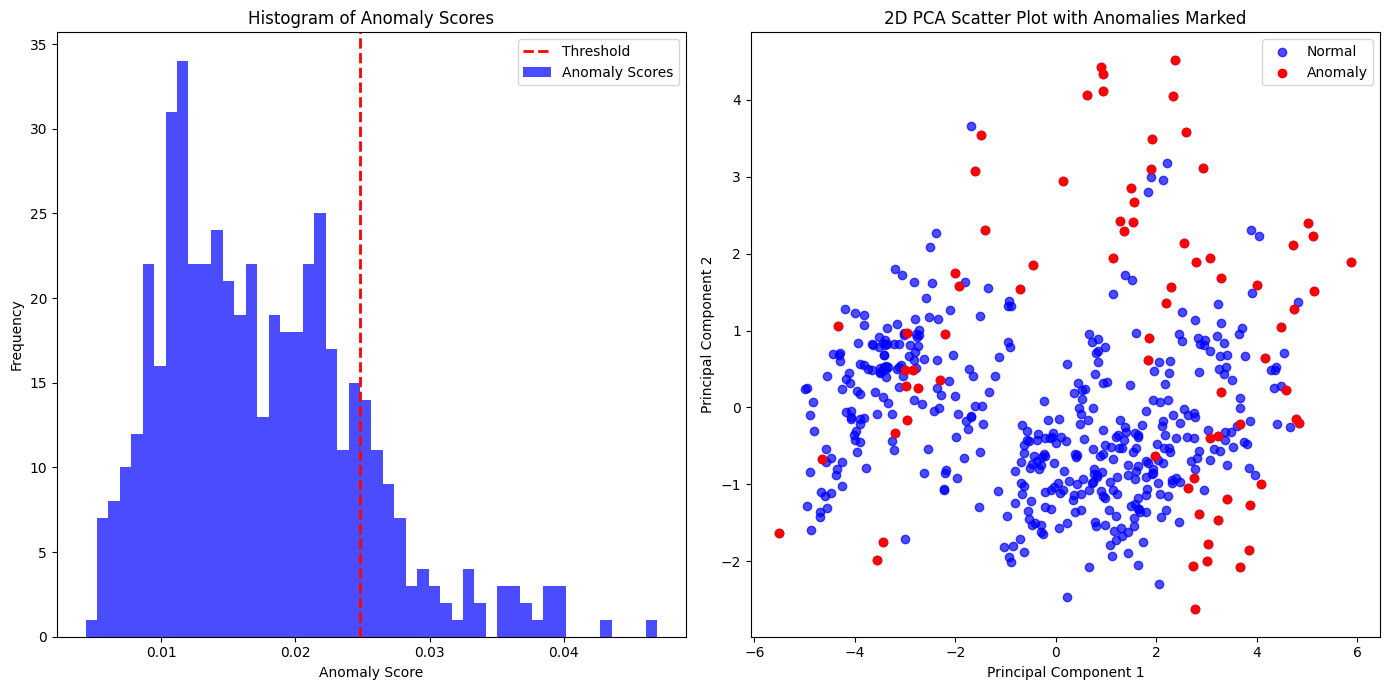

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize PCA and reduce the dimensions to 2
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_renamed.drop(columns=['CLUSTER_ID', 'DISTANCE_TO_CENTROID', 'ANOMALY_SCORE', 'IS_ANOMALY'])), columns=['PCA1', 'PCA2'])

# Combine the PCA result with the anomaly score and the flag for anomalies
df_pca['ANOMALY_SCORE'] = df_renamed['ANOMALY_SCORE']
df_pca['IS_ANOMALY'] = df_renamed['IS_ANOMALY']

# Plotting the distribution of anomaly scores
plt.figure(figsize=(14, 7))

# Histogram of anomaly scores
plt.subplot(1, 2, 1)
plt.hist(df_pca['ANOMALY_SCORE'], bins=50, color='blue', alpha=0.7)
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2)
plt.title('Histogram of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend(['Threshold', 'Anomaly Scores'])

# Scatter plot of the original data with anomalies marked
plt.subplot(1, 2, 2)
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c='blue', alpha=0.7)
plt.scatter(df_pca[df_pca['IS_ANOMALY']]['PCA1'], df_pca[df_pca['IS_ANOMALY']]['PCA2'], c='red')
plt.title('2D PCA Scatter Plot with Anomalies Marked')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(['Normal', 'Anomaly'])

plt.tight_layout()
plt.show()



In [5]:
# export the dataframe to a csv file
df_renamed.to_csv('anomaly_scores.csv', index=False)